# 5. 딥러닝 기초

## 5.1 선형 회귀(Linear Regression)

- 연속된 값을 예측
    - ex) 주택 가격, 기온, 판매량 ...

----

#### 5.1.1 선형 회귀의 기본 요소들

-  예측 함수가 입력 피처들 의 선형 조합으로 표현된다고 가정

----

#### 5.1.2 선형 모델

- 간단란 예로 집의 면적(제곱 미터)과 지어진 후 몇 년이 되었는지를 입력으로 사용해서 주택 가격을 예측하는 문제

price=𝑤area ·area+𝑤age ·age+𝑏

- 벡터로 표현
    - 𝑦ˆ=𝑤1 ·𝑥1 +...+𝑤𝑑 ·𝑥𝑑 +𝑏
    - 𝑦ˆ = w⊤x + 𝑏 

- 데이터 포인트들의 집합𝑋 와예측값yˆ 은아래와같은행렬-벡터곱의공식이됩니다.
    - yˆ = Xw + 𝑏

____

#### 5.1.3 학습 데이터

- 레이블을 예측하기 위해서 사용된 두 값은 ’피처(feature)’ 또는 ’공변량(covariate)’이라고 합니다. 피처는 샘플의 특징을 표현하는데 사용

- 일반적으로 수집한 샘플의 개수를 𝑛 으로 표기하고, 각 샘플은 인덱스 𝑖 를 사용해서 \\(𝑥^{(𝑖)} = [𝑥_1^{(i)}, 𝑥_2^{(i)}]\\) 와 레이블은 \\(𝑦^{(𝑖)}\\) 로 표현

____

#### 5.1.4 Loss 함수

- \\(ㅣ^{(i)}(w, b) =   \frac{1}{2} ( \hat{y^{(i)}} - y^{(i)}) ^2\\)
    - \\(ㅣ^{(i)}(w, b)\\) --> loss function
    - \\(( \hat{y^{(i)}} - y^{(i)}) ^2\\) --> square loss

- \\(  L(w, b) = \frac{1}{n} \sum_{i=1}^n l^{(i)}(w, b) = \frac{1}{n} \sum_{i=1}^n \frac{1}{2}(w^{T}x^{(i)} + b -y^{(i)})^2  \\)

- 학습 샘플들의 평균loss를 최소화하는 모델 파라미터 \\( w^{*}\\) 와 \\( b^{*}\\) 를 찾는 것이 모델을 학습시키는 것

____

#### 5.1.5 최적화 알고리즘

- 딥러닝에서는 산술적인 솔루션으로 미니 배치를 적용한 stochastic gradient descent 방법이 널리 사용
- 일반적으로는 난수를 이용해서 모델 파라미터를 초기화합니다. 그 후, 데이터를 반복적으로 사용해서 loss 함수의 값을 줄이는 것을 반복합니다. <br>
  각 반 복에서는 학습 데이터에서 미리 정한 개수만큼의 샘플들을 임의로 또 균일하게 뽑아서 미니 배치 B 를 구성하고, <br>
  미니 배치의 값들에 대한 평균 loss 값의 모델 파라미터에 대한 미분을 구합니다. <br>
  마지막으로 이 결과와 미리 정의된 스탭크기 𝜂 > 0 를 곱해서 loss 값이 최소화 되 는방향으로 파라미터를 변경합니다. 
  <br>수식으로 표현하면 다음과 같습니다.

____

#### 5.1.6 모델을 이용한 예측

- 학습을 통해서 loss 함수를 최소화시키는 최적의 값 w*,𝑏* 를 구할 필요는 없습니다.<br>
  다만,이 최적의 값에 근접하는 값을 학습을 통해서 찾는 것입니다.이후,학습된 선형회귀 모델 wˆ⊤𝑥+ˆ𝑏 을 이용해서 학습 데이터셋에 없는 집정보에 대한 집가격을 추정합니다. <br>
  “추정”을 “모델 예측(prediction)” 또는 “모델 추론 (inference)” 라고 합니다.

____

#### 5.1.7 선형 회귀에서 딥 네트워크로

- 지금까지 선형 함수만을 이야기했는데, 뉴럴 네트워크는 이 보다 많은 것을 다룹니다. <br>
  물론 선형 함수는 중요한 구성 요소입니다. 이제 모든 것을 ‘층(layer)’ 표기법으로 다시 기술해 보겠습니다.

____

#### 5.1.8 뉴럴 네트워크 다이어그램

- 따로 그림 참조할것...

____

#### 5.1.9 생물학으로 우회

____

#### 5.1.10 벡터화로 빠르게 만들기

- 모델 학습 및 예측을 수행할 때, 벡터 연산을 사용하고 이를 통해서 여러 값들은 한번에 처리합니다. <br>
  이것이 왜 중요한지 설명하기위해서 벡터들을 더하는 두 가지 방법을 생각해봅시다. 우선 1000 차원의 벡터 두 개를 생성

In [1]:
from mxnet import nd 
from time import time

a = nd.ones(shape=10000)
b = nd.ones(shape=10000)

- 두 벡터를 더하는 방법 중에 하나는 for loop을 이용해서 벡터의 각 값들을 하나씩 더하는 것

In [3]:
start = time()
c = nd.zeros(shape=10000) 

for i in range(10000):
    c[i] = a[i] + b[i]
    
time() - start

0.7026338577270508

- 다른 방법으로는 두 벡터를 직접 더함

In [4]:
start = time()
d = a + b 
time() - start

0.00010895729064941406

- 당연하게도 벡터를 직접 더하는 방법이 훨씬 더 빠릅니다. <br>
  코드를 벡터화하는 것은 연산 속도를 빠르게 하는 좋은 방법입니다.  <br>
  마찬가지로 연산식을 간단하게 하고, 표기에 있어서 잠재적인 오류를 줄여주는 효과

#### 5.1.11 표준 분포와 제곱 Loss

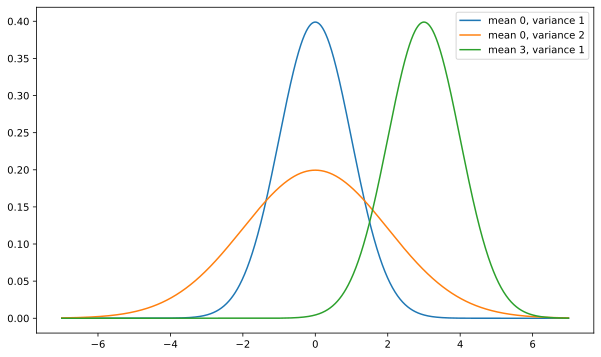

In [9]:
from matplotlib import pyplot as plt 
from IPython import display
from mxnet import nd
import math

x = nd.arange(-7, 7, 0.01)
# Mean and variance pairs 
parameters = [(0,1), (0,2), (3,1)]

# Display SVG rather than JPG
display.set_matplotlib_formats('svg')
plt.figure(figsize=(10, 6))

for (mu, sigma) in parameters:
    p = (1/math.sqrt(2 * math.pi * sigma**2)) * nd.exp(-(0.5/sigma**2) * (x-mu)**2)    
    plt.plot(x.asnumpy(), p.asnumpy(), label='mean ' + str(mu) + ', variance ' + str(sigma))
    
plt.legend()
plt.show()

____

#### 5.1.12 요약 

- 머신러닝에서 중요한 요소는 학습 데이터, loss 함수, 최적화 알고리즘, 그리고 당연하지만 모델자체입니다.
- 벡터화는 모든 것(수학)을 좋게 만들고, (코드를) 빠르게 만들어 줍니다.
- objective 함수를 최소화하는 것과 maximum likelihood를 구하는 것은 같은 것입니다.
- 선형 모델도 뉴럴 모델입니다.

## 5.2 선형 회귀를 처음부터 구현하기

In [1]:
from IPython import display
from matplotlib import pyplot as plt 
from mxnet import autograd, nd 
import random

#### 5.2.1 데이터셋 생성하기

In [2]:
num_inputs = 2
num_examples = 1000
true_w = nd.array([2, -3.4])
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [3]:
features[0], labels[0]

(
 [1.1630787 0.4838046]
 <NDArray 2 @cpu(0)>, 
 [4.879625]
 <NDArray 1 @cpu(0)>)

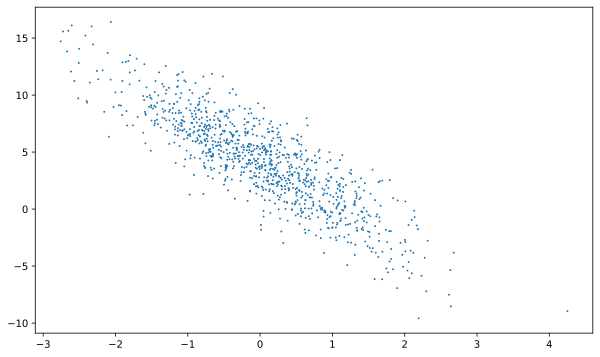

In [4]:
def use_svg_display():
    # Display in vector graphics
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)): 
    use_svg_display()
    # Set the size of the graph to be plotted 
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

____

#### 5.2.2 데이터 읽기

In [5]:
# This function has been saved in the d2l package for future use
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    # The examples are read at random, in no particular order 
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The “take” function will then return the corresponding element based # on the indices

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels): 
    print(X, y)
    break


[[-0.4321104  -0.18872944]
 [-1.298962   -0.831105  ]
 [ 0.28553766 -1.9045949 ]
 [ 0.575461   -0.4195624 ]
 [ 1.5864965  -1.7073818 ]
 [-0.12590429 -0.77844995]
 [ 0.17943779  1.3990829 ]
 [ 2.2772653  -0.4185659 ]
 [-1.4248496   1.634742  ]
 [ 1.5221801  -0.63030165]]
<NDArray 10x2 @cpu(0)> 
[ 3.985683    4.429899   11.244833    6.7590284  13.196526    6.581011
 -0.20697866 10.188307   -4.2019567   9.356409  ]
<NDArray 10 @cpu(0)>


____

#### 5.2.3 모델 파라미터들 초기화하기

In [11]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
print(w.shape)
b = nd.zeros(shape=(1,))
print(b.shape)

(2, 1)
(1,)


In [14]:
w.attach_grad()
b.attach_grad()

____

#### 5.2.4 모델 정의하기

In [15]:
# This function has been saved in the d2l package for future use
def linreg(X, w, b):
    return nd.dot(X, w) + b

____

#### 5.2.5 손실 함수(loss function) 정의하기

In [16]:
# This function has been saved in the d2l package for future use
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

____

#### 5.2.6 최적화 알고리즘 정의하기

In [17]:
# This function has been saved in the d2l package for future use
def sgd(params, lr, batch_size): 
    for param in params:
        param[:] = param - lr * param.grad / batch_size

#### 5.7 학습

In [18]:
lr = 0.03 # Learning rate
num_epochs = 10 # Number of iterations 
net = linreg # Our fancy linear model 
loss = squared_loss # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all 
    # the examples in the training data set are used once in one epoch
    # iteration. The features and tags of mini-batch examples are given by X 
    # and y respectively
    
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y) # Minibatch loss in X and y
        l.backward() # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
    
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.035164
epoch 2, loss 0.000124
epoch 3, loss 0.000048
epoch 4, loss 0.000048
epoch 5, loss 0.000048
epoch 6, loss 0.000048
epoch 7, loss 0.000048
epoch 8, loss 0.000048
epoch 9, loss 0.000048
epoch 10, loss 0.000048


In [19]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w 
[-0.00013232  0.00031519]
<NDArray 2 @cpu(0)>
Error in estimating b 
[-0.00041819]
<NDArray 1 @cpu(0)>


____

## 5.3 선형 회귀의 간결한 구현

#### 5.3.1 데이터 셋 만들기

In [20]:
from mxnet import autograd, nd

num_inputs = 2
num_examples = 1000

true_w = nd.array([2, -3.4])
true_b = 4.2

features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

____

#### 5.3.2 데이터 읽기

In [21]:
from mxnet.gluon import data as gdata 

batch_size = 10

# Combine the features and labels of the training data
dataset = gdata.ArrayDataset(features, labels)

# Randomly reading mini-batches
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [22]:
for X, y in data_iter:
    print(X, y)
    break


[[-1.5152733  -1.0601213 ]
 [ 0.5707338  -0.603781  ]
 [ 0.08496547 -1.3156533 ]
 [-0.27882883 -1.2957566 ]
 [-0.66963845  1.1818241 ]
 [ 1.9485527   0.5890606 ]
 [ 0.4239656   0.02062522]
 [ 0.1316699   0.5989745 ]
 [-0.9147789   0.20934172]
 [ 2.19628    -0.05345696]]
<NDArray 10x2 @cpu(0)> 
[ 4.784173   7.3935843  8.837647   8.06171   -1.155748   6.113078
  4.982147   2.430585   1.6650598  8.768978 ]
<NDArray 10 @cpu(0)>


____

#### 5.3.3 모델 정의하기

In [23]:
from mxnet.gluon import nn
net = nn.Sequential()

In [24]:
net.add(nn.Dense(1))

In [25]:
net

Sequential(
  (0): Dense(None -> 1, linear)
)

____

#### 5.3.4 모델 파라미터들 초기화하기

In [26]:
from mxnet import init

# mean 0, sd 0.01 , bias default = 0
net.initialize(init.Normal(sigma=0.01))

____

#### 5.3.5 손실 함수(loss function) 정의하기

In [28]:
from mxnet.gluon import loss as gloss
loss = gloss.L2Loss() # The squared loss is also known as the L2 norm loss
loss

L2Loss(batch_axis=0, w=1.0)

____

#### 5.3.6 최적화 알고리즘 정의하기

In [29]:
from mxnet import gluon
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})
trainer

____

#### 5.3.7 학습

In [30]:
num_epochs = 3

for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record(): 
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
        
    l = loss(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.056476
epoch 2, loss: 0.000263
epoch 3, loss: 0.000050


In [32]:
w = net[0].weight.data()
print('Error in estimating w', true_w.reshape(w.shape) - w) 

b = net[0].bias.data()
print('Error in estimating b', true_b - b)

Error in estimating w 
[[ 0.00046468 -0.0008347 ]]
<NDArray 1x2 @cpu(0)>
Error in estimating b 
[0.00092173]
<NDArray 1 @cpu(0)>


____

## 5.4 Softmax 회귀(regression)

- 코드 없음... 내용은 잘 볼것.

- one hot encoding 
    - {고양이, 닭, 강아지} --> 𝑦 ∈ {(1,0,0),(0,1,0),(0,0,1)}, 𝑦 는 3차원 벡터로 (1,0,0)은 고양이를, (0,1,0)은 닭은, (0,0,1)은 강아지를 의미

- softmax 회귀(regression)의 결과는 모든 결과값들의 합이 1이 되도록 하는 비선형성에 영향을 받고,각 결과값은 0 또는 양수값

____

## 5.5 이미지 분류 데이터 (Fashion-MNIST)

#### 5.5 이미지 분류 데이터 (Fashion-MNIST)

In [6]:
import sys 
sys.path.insert(0, '..')
%matplotlib inline
import d2l
from mxnet.gluon import data as gdata 
import sys
import time

In [7]:
mnist_train = gdata.vision.FashionMNIST(train=True)
mnist_test = gdata.vision.FashionMNIST(train=False)

In [8]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [9]:
features, label = mnist_train[0]

In [10]:
features.shape, features.dtype

((28, 28, 1), numpy.uint8)

In [11]:
label, type(label), label.dtype

(2, numpy.int32, dtype('int32'))

In [31]:
# This function has been saved in the d2l package for future use
def get_fashion_mnist_labels(labels):
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat',
        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    return [text_labels[int(i)] for i in labels]

In [18]:
# This function has been saved in the d2l package for future use
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # Here _ means that we ignore (not use) variables
    _, figs = d2l.plt.subplots(1, len(images), figsize=(12, 12))
    
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

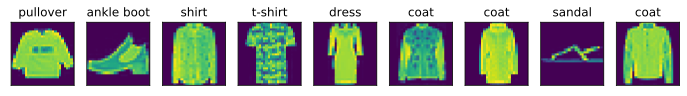

In [9]:
X, y = mnist_train[0:9]
show_fashion_mnist(X, get_fashion_mnist_labels(y))

___

#### 5.5.2 미니 배치 읽기

In [10]:
batch_size = 256
transformer = gdata.vision.transforms.ToTensor() 

if sys.platform.startswith('win'):
    # 0 means no additional processes are needed to speed up the reading of # data
    num_workers = 0
else:
    num_workers = 4
    
train_iter = gdata.DataLoader(
    mnist_train.transform_first(transformer),
    batch_size, shuffle=True,
    num_workers=num_workers)
    
test_iter = gdata.DataLoader(
    mnist_test.transform_first(transformer),
    batch_size, shuffle=False,
    num_workers=num_workers)

In [11]:
start = time.time()

for X, y in train_iter:
    continue
    
print('%.2f sec' % (time.time() - start))

0.61 sec


____

## 5.6 Softmax 회귀(regression)를 처음부터 구현하기

In [12]:
import sys 
sys.path.insert(0, '..')

%matplotlib inline
import d2l
from mxnet import autograd, nd

In [13]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

____

#### 5.6.1 모델 파라미터 초기화하기

In [27]:
num_inputs = 784
num_outputs = 10
W = nd.random.normal(scale=0.01, shape=(num_inputs, num_outputs))
b = nd.zeros(num_outputs)

In [28]:
W.attach_grad()
b.attach_grad()

____

#### 5.6.2 Softmax

In [16]:
X = nd.array([[1, 2, 3], [4, 5, 6]])
X.sum(axis=0, keepdims=True), X.sum(axis=1, keepdims=True)

(
 [[5. 7. 9.]]
 <NDArray 1x3 @cpu(0)>, 
 [[ 6.]
  [15.]]
 <NDArray 2x1 @cpu(0)>)

In [17]:
def softmax(X): 
    X_exp = X.exp()
    partition = X_exp.sum(axis=1, keepdims=True)
    return X_exp / partition # The broadcast mechanism is applied here

In [18]:
X = nd.random.normal(shape=(2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(axis=1)

(
 [[0.01606132 0.46726644 0.16146936 0.33617657 0.01902632]
  [0.27215305 0.16692851 0.04439886 0.39427418 0.12224543]]
 <NDArray 2x5 @cpu(0)>, 
 [1. 1.]
 <NDArray 2 @cpu(0)>)

____

#### 5.6.3 모델

In [19]:
def net(X):
    return softmax(nd.dot(X.reshape((-1, num_inputs)), W) + b)

____

#### 5.6.4 손실 함수(loss function)

In [20]:
y_hat = nd.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = nd.array([0, 2], dtype='int32')
nd.pick(y_hat, y)


[0.1 0.5]
<NDArray 2 @cpu(0)>

In [10]:
def cross_entropy(y_hat, y):
    return - nd.pick(y_hat, y).log()

____

#### 5.6.5 분류 정확도

In [8]:
def accuracy(y_hat, y):
    return (y_hat.argmax(axis=1) == y.astype('float32')).mean().asscalar()

In [3]:
accuracy(y_hat, y)

NameError: name 'y_hat' is not defined

In [9]:
# The function will be gradually improved: the complete implementation will be 
# discussed in the "Image Augmentation" section
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
        n += y.size
    return acc_sum / n

In [25]:
evaluate_accuracy(test_iter, net)

0.0856

____

#### 5.6.6 모델 학습

In [7]:
num_epochs, lr = 5, 0.1
# This function has been saved in the d2l package for future use
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, trainer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0 
        for X, y in train_iter:
            with autograd.record(): 
                y_hat = net(X)
                l = loss(y_hat, y).sum()
            l.backward()
        
            if trainer is None:
                d2l.sgd(params, lr, batch_size)
            else:
                # This will be illustrated in the next section 
                trainer.step(batch_size)
                
            y = y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
            n += y.size
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

In [30]:
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs,batch_size, [W, b], lr)

epoch 1, loss 0.7869, train acc 0.747, test acc 0.803
epoch 2, loss 0.5729, train acc 0.811, test acc 0.818
epoch 3, loss 0.5295, train acc 0.824, test acc 0.828
epoch 4, loss 0.5050, train acc 0.830, test acc 0.835
epoch 5, loss 0.4891, train acc 0.834, test acc 0.841


____

#### 5.6.7 예측

In [23]:
for X, y in test_iter: 
    break
    
    
true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
    
titles = [truelabel + '\n' + predlabel
            for truelabel, predlabel in zip(true_labels, pred_labels)]
    
show_fashion_mnist(X[0:9], titles[0:9])

NameError: name 'show_fashion_mnist' is not defined

____

## 5.7 Softmax 회귀(regression)의 간결한 구현

In [1]:
import sys 
sys.path.insert(0, '..')
%matplotlib inline
import d2l
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

____

#### 5.7.1 모델 파라미터 초기화하기


In [3]:
net = nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

____

#### 5.7.2 The Softmax

In [4]:
loss = gloss.SoftmaxCrossEntropyLoss()

____

#### 5.7.3 최적화 알고리즘


In [5]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

In [18]:
num_epochs = 20
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 0.4692, train acc 0.841, test acc 0.841
epoch 2, loss 0.4619, train acc 0.843, test acc 0.847
epoch 3, loss 0.4558, train acc 0.844, test acc 0.848
epoch 4, loss 0.4526, train acc 0.846, test acc 0.849
epoch 5, loss 0.4467, train acc 0.848, test acc 0.849
epoch 6, loss 0.4436, train acc 0.848, test acc 0.851
epoch 7, loss 0.4400, train acc 0.849, test acc 0.850
epoch 8, loss 0.4369, train acc 0.850, test acc 0.853
epoch 9, loss 0.4346, train acc 0.852, test acc 0.852
epoch 10, loss 0.4322, train acc 0.852, test acc 0.852
epoch 11, loss 0.4293, train acc 0.853, test acc 0.852
epoch 12, loss 0.4286, train acc 0.853, test acc 0.854
epoch 13, loss 0.4252, train acc 0.854, test acc 0.852
epoch 14, loss 0.4237, train acc 0.855, test acc 0.849
epoch 15, loss 0.4228, train acc 0.855, test acc 0.850
epoch 16, loss 0.4208, train acc 0.856, test acc 0.855
epoch 17, loss 0.4196, train acc 0.857, test acc 0.851
epoch 18, loss 0.4185, train acc 0.857, test acc 0.852
epoch 19, loss 0.41

____

## 5.8 다층 퍼셉트론 (Multilayer Perceptron)

#### 5.8.6 ReLU 함수

- ReLU(𝑥) = max(𝑥, 0)

In [32]:
import sys 
sys.path.insert(0, '..')
%matplotlib inline
import d2l
from mxnet import autograd, nd

def xyplot(x_vals, y_vals, name): 
    d2l.set_figsize(figsize=(5, 2.5)) 
    d2l.plt.plot(x_vals.asnumpy(), y_vals.asnumpy()) 
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')

(160,)


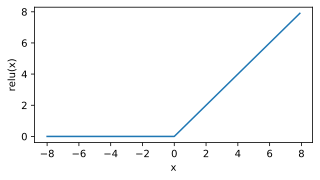

In [34]:
x = nd.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = x.relu()
print(x.shape)    
xyplot(x, y, 'relu')    

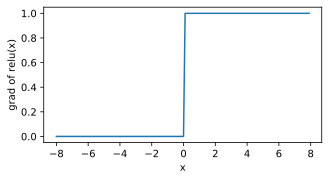

In [35]:
y.backward()
xyplot(x, x.grad, 'grad of relu')

- ReLU를 사용하는 이유는 값이 사라지거나 그대로 전달하게 하는 식으로 미분이 아주 잘 작동하기 때문입니다. <br/>
  이러한 특징으로 인해 최적화가 더 잘 되고, (나중에 설명할) vanishing gradient 문제를 줄여줍니다.

____

#### 5.8.7 Sigmoid 함수

- sigmoid 함수는 이전의 뉴럴 네트워크에서 일반적으로 사용되었으나, 현재는 더 간단한 ReLU 함수로 대체되었습니다.

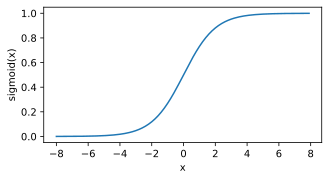

In [36]:
with autograd.record(): 
    y = x.sigmoid() 
xyplot(x, y, 'sigmoid')

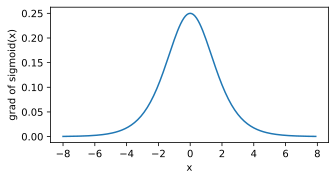

In [37]:
y.backward()
xyplot(x, x.grad, 'grad of sigmoid')

- Sigmoid 함수의 미분은 아래와 같이 생겼습니다. 입력이 0이면, Sigmoid 함수의 미분의 최대값인 0.25 가 됩니다.<br/> 
  입력값이 0에서 멀어지면, Sigmoid 함수의 미분값은 0으로 접근합니다.

____

#### 5.8.8 Tanh 함수

- Tanh (Hyperbolic Tangent) 함수는 값을 -1와 1사이 값으로 변환합니다.

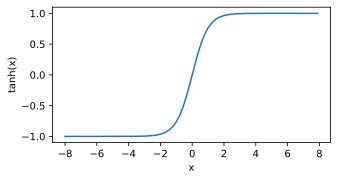

In [38]:
with autograd.record(): 
    y = x.tanh()
xyplot(x, y, 'tanh')

- Tanh 함수를 도식화를 아래와 같이 할 수 있습니다. 입력이 0에 가까워지면, Tanh 함수는 선형 변환에 가까워 집니다. <br/>
  생긴 모양이 Sigmoid 함수와 비슷하지만, Tanh 함수는 좌표의 원점을 기준으로 대칭인 형태를 띕니다.

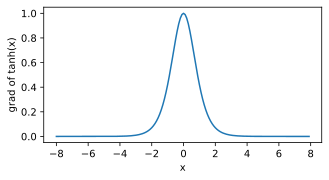

In [39]:
y.backward()
xyplot(x, x.grad, 'grad of tanh')

- Tanh 함수의 미분은 아래와 같이 그려지는데, 입력이 0과 가까우면 Tanh 함수의 미분은 최대값이 1에 근접하게 됩니다. <br/>
  입력값이 0에서 멀어지면, Tanh 함수의 미분은 0에 접근합니다.


____

## 5.9 다층 퍼셉트론(multilayer perceptron)을 처음부터 구현하기

In [23]:
import sys 
sys.path.insert(0, '..')
%matplotlib inline
import d2l
from mxnet import nd, autograd
from mxnet.gluon import loss as gloss

In [3]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [4]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(num_outputs)

params = [W1, b1, W2, b2]

for param in params: 
    param.attach_grad()

#### 5.9.2 활성화 함수(activation function)

In [5]:
def relu(X):
    return nd.maximum(X, 0)

#### 5.9.3 모델

In [6]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(nd.dot(X, W1) + b1)
    return nd.dot(H, W2) + b2

#### 5.9.4 손실함수(loss function)

In [7]:
loss = gloss.SoftmaxCrossEntropyLoss()

#### 5.9.5 학습

In [28]:
num_epochs, lr = 10, 0.5
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.4839, train acc 0.821, test acc 0.850
epoch 2, loss 0.4331, train acc 0.839, test acc 0.859
epoch 3, loss 0.3946, train acc 0.854, test acc 0.856
epoch 4, loss 0.3703, train acc 0.864, test acc 0.875
epoch 5, loss 0.3522, train acc 0.870, test acc 0.878
epoch 6, loss 0.3368, train acc 0.877, test acc 0.873
epoch 7, loss 0.3243, train acc 0.881, test acc 0.884
epoch 8, loss 0.3166, train acc 0.882, test acc 0.886
epoch 9, loss 0.3050, train acc 0.887, test acc 0.881
epoch 10, loss 0.2934, train acc 0.891, test acc 0.884


## 5.10 다층 퍼셉트론 (multilayer perceptron)의 간결한 구현

In [12]:
import sys
sys.path.insert(0, '..')
import d2l
from mxnet import gluon, init, autograd
from mxnet.gluon import loss as gloss, nn

In [8]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'))
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

In [13]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = gloss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None,
              None, trainer)

epoch 1, loss 0.8065, train acc 0.697, test acc 0.824
epoch 2, loss 0.5091, train acc 0.813, test acc 0.847
epoch 3, loss 0.4325, train acc 0.841, test acc 0.862
epoch 4, loss 0.3927, train acc 0.854, test acc 0.870
epoch 5, loss 0.3732, train acc 0.862, test acc 0.871
epoch 6, loss 0.3519, train acc 0.870, test acc 0.868
epoch 7, loss 0.3366, train acc 0.876, test acc 0.874
epoch 8, loss 0.3288, train acc 0.878, test acc 0.882
epoch 9, loss 0.3174, train acc 0.884, test acc 0.880
epoch 10, loss 0.3026, train acc 0.888, test acc 0.885


#### 5.11.4 다항식 회귀 (Polynomial Regression)

In [23]:
import sys
sys.path.insert(0, '..')
%matplotlib inline 
import d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

In [24]:
maxdegree = 20 # Maximum degree of the polynomial
n_train, n_test = 100, 1000 # Training and test data set sizes 
true_w = nd.zeros(maxdegree) # Allocate lots of empty space 
true_w[0:4] = nd.array([5, 1.2, -3.4, 5.6])

features = nd.random.normal(shape=(n_train + n_test, 1))
features = nd.random.shuffle(features)

poly_features = nd.power(features, nd.arange(maxdegree).reshape((1, -1)))
poly_features = poly_features / (
    nd.gamma(nd.arange(maxdegree) + 1).reshape((1, -1)))
labels = nd.dot(poly_features, true_w)
labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [25]:
features[:2], poly_features[:2], labels[:2]

(
 [[-0.26733622]
  [ 0.25134274]]
 <NDArray 2x1 @cpu(0)>, 
 [[ 1.00000000e+00 -2.67336220e-01  3.57343256e-02 -3.18435975e-03
    2.12823681e-04 -1.13790966e-05  5.07007428e-07 -1.93630640e-08
    6.47056020e-10 -1.92201689e-11  5.13824714e-13 -1.24876323e-14
    2.78199686e-16 -5.72098915e-18  1.09244826e-19 -1.94700666e-21
    3.25315856e-23 -5.11580685e-25  7.59800240e-27 -1.06906373e-28]
  [ 1.00000000e+00  2.51342744e-01  3.15865874e-02  2.64635310e-03
    1.66285419e-04  8.35892661e-06  3.50159269e-07  1.25728565e-08
    3.95011995e-10  1.10314891e-11  2.77268470e-13  6.33540156e-15
    1.32696433e-16  2.56556043e-18  4.60596428e-20  7.71783796e-22
    1.21238904e-23  1.79250127e-25  2.50295666e-27  3.31105214e-29]]
 <NDArray 2x20 @cpu(0)>, 
 [4.4868817 5.1272197]
 <NDArray 2 @cpu(0)>)

In [40]:
# This function has been saved in the d2l package for future use
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize) 
    d2l.plt.xlabel(x_label) 
    d2l.plt.ylabel(y_label) 
    d2l.plt.semilogy(x_vals, y_vals) 
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [41]:
num_epochs, loss = 200, gloss.L2Loss()
def fit_and_plot(train_features, test_features, train_labels, test_labels): 
    net = nn.Sequential()
    
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net.add(nn.Dense(1, use_bias=False))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(
        train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': 0.01})
    train_ls, test_ls = [], []

    for _ in range(num_epochs): 
        for X, y in train_iter:
            with autograd.record(): 
                l = loss(net(X), y)
                
            l.backward()
            trainer.step(batch_size)
            
        train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
        
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
         range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy())

final epoch: train loss 0.006670383 test loss 0.0049214247
weight: [[ 5.002653   1.2003365 -3.4110086  5.614837 ]]


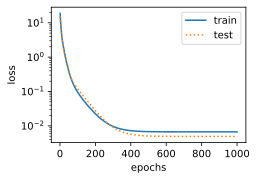

In [30]:
num_epochs = 1000
# Pick the first four dimensions, i.e. 1, x, x^2, x^3 from the polynomial # features
fit_and_plot(poly_features[:n_train, 0:4], poly_features[n_train:, 0:4],
             labels[:n_train], labels[n_train:])

#### 선형함수 (언더피팅, underfitting)

final epoch: train loss 1.7206427 test loss 2.459985
weight: [[ 5.4280863  3.9977686 -4.4579268]]


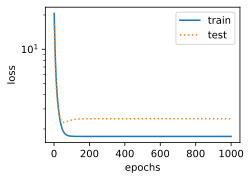

In [31]:
num_epochs = 1000
# Pick the first four dimensions, i.e. 1, x from the polynomial features 
fit_and_plot(poly_features[:n_train, 0:3], poly_features[n_train:, 0:3],
             labels[:n_train], labels[n_train:])

#### 부족한 학습 (오버피팅, overfitting)

final epoch: train loss 0.012943144 test loss 0.015348031
weight: [[ 4.94229     1.3638991  -3.1819665   5.031319   -0.5627068   1.1287593
   0.02555682  0.11636257 -0.00526282  0.0432515  -0.03468726  0.04136863
   0.02593365 -0.02177629  0.02369752  0.03792059  0.06492355  0.03302516
   0.05300405 -0.05018909]]


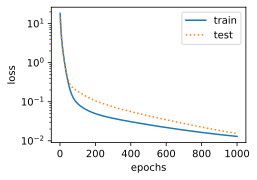

In [33]:
num_epochs = 1000
n_subset = 100 # Subset of data to train on 
n_degree = 20 # Degree of polynomials 
fit_and_plot(poly_features[1:n_subset, 0:n_degree],
             poly_features[n_train:, 0:n_degree], labels[1:n_subset],
             labels[n_train:])

## 5.12 가중치 감쇠 ( weight decay )

In [35]:
import sys 
sys.path.insert(0, '..')
%matplotlib inline
import d2l
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = nd.ones((num_inputs, 1)) * 0.01, 0.05

features = nd.random.normal(shape=(n_train + n_test, num_inputs))

labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

train_features, test_features = features[:n_train, :], features[n_train:, :]

train_labels, test_labels = labels[:n_train], labels[n_train:]

In [36]:
def init_params():
    w = nd.random.normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    w.attach_grad()
    b.attach_grad()
    return [w, b]

In [37]:
def l2_penalty(w):
    return (w**2).sum() / 2

In [48]:
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = d2l.linreg, d2l.squared_loss
train_iter = gdata.DataLoader(gdata.ArrayDataset(
    train_features, train_labels), batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params() 
    train_ls, test_ls = [], [] 
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                # The L2 norm penalty term has been added
                l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b),
                         train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b),
                        test_labels).mean().asscalar())
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('l2 norm of w:', w.norm().asscalar())

l2 norm of w: 12.367936


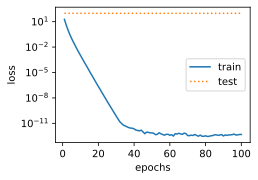

In [49]:
fit_and_plot(lambd=0)

l2 norm of w: 0.035481624


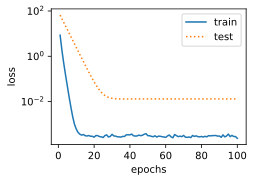

In [50]:
fit_and_plot(lambd=3)

#### 간결한 구현

In [51]:
def fit_and_plot_gluon(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    # The weight parameter has been decayed. Weight names generally end with # "weight".
    trainer_w = gluon.Trainer(net.collect_params('.*weight'), 'sgd',
                              {'learning_rate': lr, 'wd': wd})
    # The bias parameter has not decayed. Bias names generally end with "bias"
    trainer_b = gluon.Trainer(net.collect_params('.*bias'), 'sgd',
                              {'learning_rate': lr})
    train_ls, test_ls = [], [] 
    for _ in range(num_epochs): 
        for X, y in train_iter:
            with autograd.record(): 
                l = loss(net(X), y)
            l.backward()
            # Call the step function on each of the two Trainer instances to # update the weight and bias separately 
            trainer_w.step(batch_size)
            trainer_b.step(batch_size)
        train_ls.append(loss(net(train_features),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                            test_labels).mean().asscalar())
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net[0].weight.data().norm().asscalar())

L2 norm of w: 13.698756


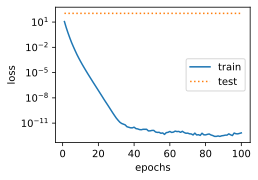

In [52]:
fit_and_plot_gluon(0)

L2 norm of w: 0.039392535


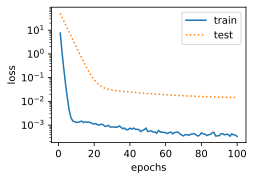

In [53]:
fit_and_plot_gluon(3)

## 5.13 드롭아웃 (dropout)

In [1]:
import sys 
sys.path.insert(0, '..')
import d2l
from mxnet import autograd, gluon, init, nd 
from mxnet.gluon import loss as gloss, nn

def dropout(X, drop_prob):
    assert 0 <= drop_prob <= 1
    # In this case, all elements are dropped out 
    if drop_prob == 1:
        return X.zeros_like()
    mask = nd.random.uniform(0, 1, X.shape) > drop_prob 
    return mask * X / (1.0-drop_prob)

In [2]:
X = nd.arange(16).reshape((2, 8)) 
print(dropout(X, 0)) 
print(dropout(X, 0.5)) 
print(dropout(X, 1))


[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]]
<NDArray 2x8 @cpu(0)>

[[ 0.  0.  0.  0.  8. 10. 12.  0.]
 [16.  0. 20. 22.  0.  0.  0. 30.]]
<NDArray 2x8 @cpu(0)>

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
<NDArray 2x8 @cpu(0)>


In [3]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens1))
b1 = nd.zeros(num_hiddens1)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens1, num_hiddens2))
b2 = nd.zeros(num_hiddens2)
W3 = nd.random.normal(scale=0.01, shape=(num_hiddens2, num_outputs))
b3 = nd.zeros(num_outputs)

params = [W1, b1, W2, b2, W3, b3] 

for param in params:
    param.attach_grad()

In [5]:
drop_prob1, drop_prob2 = 0.2, 0.5

def net(X):
    X = X.reshape((-1, num_inputs))
    H1 = (nd.dot(X, W1) + b1).relu()
    # Use dropout only when training the model 
    if autograd.is_training():
        # Add a dropout layer after the first fully connected layer
        H1 = dropout(H1, drop_prob1) 
    H2 = (nd.dot(H1, W2) + b2).relu() 
    
    if autograd.is_training():
        # Add a dropout layer after the second fully connected layer
        H2 = dropout(H2, drop_prob2) 
    return nd.dot(H2, W3) + b3

In [11]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = gloss.SoftmaxCrossEntropyLoss()

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 1.1012, train acc 0.569, test acc 0.794
epoch 2, loss 0.5715, train acc 0.789, test acc 0.838
epoch 3, loss 0.4846, train acc 0.822, test acc 0.845
epoch 4, loss 0.4472, train acc 0.837, test acc 0.857
epoch 5, loss 0.4143, train acc 0.847, test acc 0.857
epoch 6, loss 0.3959, train acc 0.855, test acc 0.870
epoch 7, loss 0.3790, train acc 0.862, test acc 0.871
epoch 8, loss 0.3643, train acc 0.866, test acc 0.877
epoch 9, loss 0.3505, train acc 0.872, test acc 0.878
epoch 10, loss 0.3438, train acc 0.875, test acc 0.883


In [12]:
net = nn.Sequential()
net.add(
    nn.Dense(256, activation="relu"),
    # Add a dropout layer after the first fully connected layer
    nn.Dropout(drop_prob1),
    nn.Dense(256, activation="relu"),
    # Add a dropout layer after the second fully connected layer 
    nn.Dropout(drop_prob2),
    nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

In [14]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})

train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None,None, trainer)

epoch 1, loss 1.2531, train acc 0.511, test acc 0.760
epoch 2, loss 0.6069, train acc 0.774, test acc 0.835
epoch 3, loss 0.5091, train acc 0.816, test acc 0.846
epoch 4, loss 0.4599, train acc 0.832, test acc 0.847
epoch 5, loss 0.4273, train acc 0.844, test acc 0.855
epoch 6, loss 0.4062, train acc 0.851, test acc 0.863
epoch 7, loss 0.3928, train acc 0.857, test acc 0.874
epoch 8, loss 0.3825, train acc 0.861, test acc 0.875
epoch 9, loss 0.3695, train acc 0.865, test acc 0.876
epoch 10, loss 0.3600, train acc 0.868, test acc 0.875


___

## 8. CONVOLUTIONAL NEURAL NETWORKS

In [15]:
from mxnet import autograd, nd 
from mxnet.gluon import nn

# Save to the d2l package.
def corr2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = nd.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1)) 
    
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

In [17]:
X = nd.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = nd.array([[0, 1], [2, 3]])
corr2d(X, K)


[[19. 25.]
 [37. 43.]]
<NDArray 2x2 @cpu(0)>